# Log Readers

Read from the 

In [4]:
import sparkles.spark as Spark
import sparkles.file_reader as fr
import pandas as pd

In [5]:
# list of how many modes in the gain block
mode_counts = np.array([1,1, 1, 14, 29, 60, 87, 105, 113, 125, 145, 166, 166, 194, 357])
mode_cumulative = np.cumsum(mode_counts)
mode_cumulative

array([   1,    2,    3,   17,   46,  106,  193,  298,  411,  536,  681,
        847, 1013, 1207, 1564])

## working on josephs magic code

In [6]:
selfRM_compare = pd.read_csv('/home/eden/code/sparkles/telem/selfRM_lab_to_sky.csv')
selfRM_telem = pd.read_csv('/home/eden/code/sparkles/telem/selfMR_total_telem.csv')

In [7]:
selfRM_telem

,column0,selfRM,type,UT,MOD,TRIG,HZ,SEPS,ANGS,AMPS,...,multcoef,ts:5,gains,mcs,camwfs_time_ts,camwfs_time_ts:1,tcsi_telsee_ts,tcsi_telpos_ts,holoop_ts,hogain_ts
0,1,selfRM_20230304_05_piPup_sparkles_triggered.fits,SKY,2023-03-05 05:18:55,True,True,NaN,20.0,0.0,0.05,...,0.98,2023-03-05 05:18:53.10276,"[0.7, 0.7, 0.55, 0.55, 0.4, 0.35, 0.25, 0.25, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2023-03-05 05:18:53.932607,2023-03-05 05:18:53.417888,2023-03-05 05:18:51.706391,2023-03-05 05:18:54.849718,2023-03-05 05:18:47.438267,2023-03-05 05:18:53.10276
1,0,selfRM_20230304_05_piPup_sparkles_nottriggered...,SKY,2023-03-05 05:24:16,True,False,1799.821533,20.0,0.0,0.05,...,0.98,2023-03-05 05:24:14.16905,"[0.7, 0.7, 0.55, 0.55, 0.4, 0.35, 0.25, 0.25, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2023-03-05 05:24:14.230601,2023-03-05 05:24:13.7159,2023-03-05 05:24:14.659258,2023-03-05 05:24:15.660386,2023-03-05 05:24:07.492774,2023-03-05 05:24:14.16905
2,2,selfRM_20230305_06_betaPic_sparkles_triggered....,SKY,2023-03-07 03:53:54,True,True,NaN,20.0,0.0,0.02,...,0.98,2023-03-07 03:53:48.466976,"[0.7, 0.7, 0.5, 0.3, 0.25, 0.25, 0.25, 0.25, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2023-03-07 03:53:51.490602,2023-03-07 03:53:53.497916,2023-03-07 03:53:53.069951,2023-03-07 03:53:52.940288,2023-03-07 03:53:45.455094,2023-03-07 03:53:48.466976
3,64,selfRM_20230307_08_lab_sparkles_sep20_amp002.fits,LAB,2023-03-08 00:06:43,True,True,NaN,20.0,0.0,0.02,...,0.98,2023-03-08 00:06:42.274663,"[0.5, 0.5, 0.3, 0.15, 0.05, 0.05, 0.05, 0.05, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2023-03-08 00:06:40.839605,2023-03-08 00:06:42.84689,2023-03-08 00:06:42.596614,2023-03-08 00:06:42.595557,2023-03-08 00:06:37.517308,2023-03-08 00:06:42.274663
4,3,selfRM_20230307_08_betaPic_sparkles_trigger_se...,SKY,2023-03-08 02:17:37,True,True,NaN,20.0,0.0,0.02,...,0.98,2023-03-08 02:17:28.230899,"[0.8, 0.8, 0.5, 0.5, 0.35, 0.3, 0.25, 0.2, 0.1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2023-03-08 02:17:36.9076,2023-03-08 02:17:36.39287,2023-03-08 02:17:30.087169,2023-03-08 02:17:36.835462,2023-03-08 02:17:30.829593,2023-03-08 02:17:28.230899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,27,selfRM_20230317_0457_HD95086.fits,SKY,2023-03-17 04:59:46,True,True,NaN,20.0,0.0,0.02,...,0.98,2023-03-17 04:59:40.002975,"[0.5, 0.5, 0.35, 0.25, 0.2, 0.2, 0.15, 0.15, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 04:59:44.061607,2023-03-17 04:59:43.546905,2023-03-17 04:59:40.756729,2023-03-17 04:59:45.938371,2023-03-17 04:59:45.384772,2023-03-17 04:59:40.002975
61,28,selfRM_20230317_0723_HD95086.fits,SKY,2023-03-17 07:23:46,True,True,NaN,20.0,0.0,0.02,...,0.98,2023-03-17 07:23:45.443951,"[0.6, 0.65, 0.35, 0.3, 0.3, 0.25, 0.25, 0.25, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 07:23:44.598604,2023-03-17 07:23:44.083903,2023-03-17 07:23:41.51859,2023-03-17 07:23:45.680403,2023-03-17 07:23:45.993223,2023-03-17 07:23:45.443951
62,31,selfRM_20230317_IMLup.fits,SKY,2023-03-17 09:57:42,True,True,NaN,20.0,0.0,0.02,...,0.98,2023-03-17 09:57:33.101407,"[0.65, 0.65, 0.35, 0.3, 0.3, 0.25, 0.25, 0.25,...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 09:57:40.747607,2023-03-17 09:57:40.232876,2023-03-17 09:57:32.013042,2023-03-17 09:57:41.487366,2023-03-17 09:57:36.634457,2023-03-17 09:57:33.101407
63,62,selfRM_20230522_LAB_spark_1799_020amps_20seps....,LAB,2023-03-17 10:44:42,False,False,NaN,NaN,NaN,NaN,...,0.98,2023-03-17 10:44:34.768566,"[0.65, 0.65, 0.35, 0.3, 0.3, 0.25, 0.25, 0.25,...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.98, 0....",2023-03-17 10:08:22.235607,2023-03-17 10:08:24.242921,2023-03-17 10:44:12.567029,2023-03-17 10:44:15.574345,2023-03-17 10:44:32.054654,2023-03-17 10:44:34.768566


## SelfRM Compare - create a OG column

iter to calculate OG


In [4]:
# create a basic OG table
# for each row, calc optical gain
RM_dir = '/home/eden/data/2023A/selfRMs/'

OGains = []
OGains_std = []
for idx, row in selfRM_compare.iterrows():
    # pull the fits files from the right place
    data_sky = fits.open(RM_dir + 'SKY/' + row['selfRM'])[0].data
    data_lab = fits.open(RM_dir +'LAB/' + row['selfRM:1'])[0].data
    diag_sky = np.diag(data_sky[5])
    diag_lab = np.diag(data_lab[5])
    OG = np.mean(diag_sky/diag_lab)
    OG_std = np.std(diag_sky/diag_lab)
    OGains.append(OG)
    OGains_std.append(OG_std)

selfRM_compare['OG'] = OGains
selfRM_compare['OG_std'] = OGains_std
selfRM_compare.sort_values(by=['selfRM'], inplace=True)
    

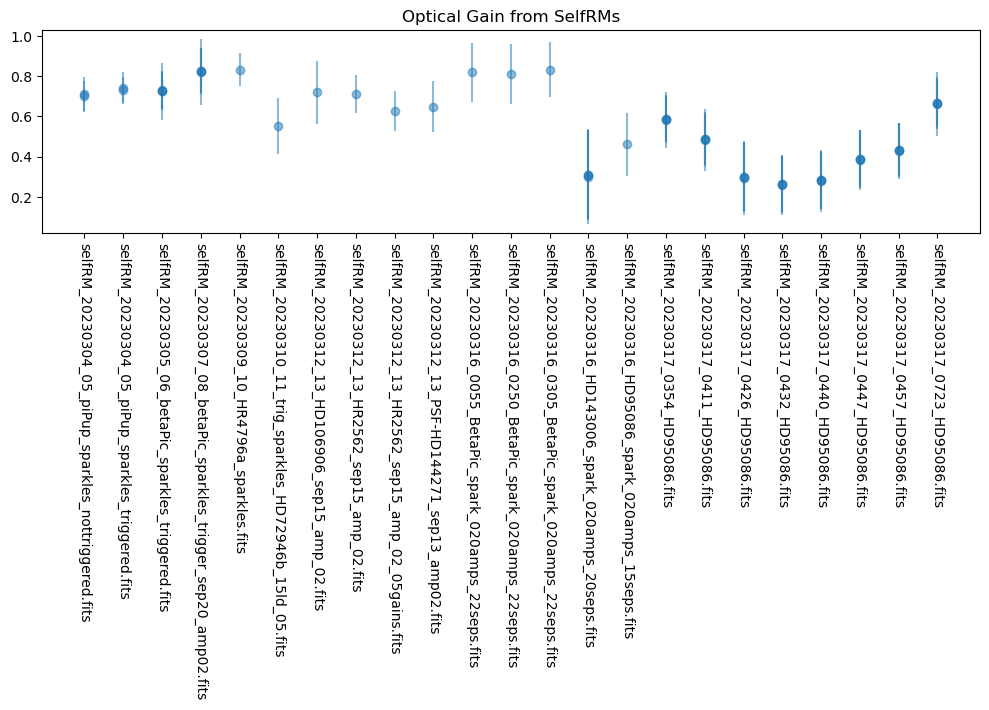

In [62]:
fig = plt.figure(figsize=(10, 7))
plt.errorbar(selfRM_compare['selfRM'], selfRM_compare['OG'], yerr = selfRM_compare['OG_std'], alpha=0.5, fmt='o')
plt.xticks(rotation=-90)
plt.tight_layout()
plt.title('Optical Gain from SelfRMs')
plt.show()


## SelfRM_telem

In [6]:
# picking only the sky selfRMs
df_telem = selfRM_telem.loc[selfRM_telem['type'] == 'SKY']

In [7]:
# mergee OG list with telemetry
df_telem_OG = pd.merge(df_telem, selfRM_compare,  on= ['selfRM'])

In [8]:
df_telem_OG.columns

Index(['column0_x', 'selfRM', 'type_x', 'UT_x', 'MOD_x', 'TRIG_x', 'HZ_x',
       'SEPS_x', 'ANGS_x', 'AMPS_x', 'ts_x', 'fps_x', 'emGain_x', 'exptime_x',
       'ts:1_x', 'atime', 'wtime', 'wmatime', 'ts:2', 'dimm_fwhm', 'ts:3',
       'ra', 'dc', 'el', 'ha', 'rotoff', 'ts:4', 'state', 'loopgain',
       'multcoef', 'ts:5', 'gains', 'mcs', 'camwfs_time_ts',
       'camwfs_time_ts:1', 'tcsi_telsee_ts', 'tcsi_telpos_ts', 'holoop_ts',
       'hogain_ts', 'column0_y', 'type_y', 'UT_y', 'MOD_y', 'TRIG_y', 'HZ_y',
       'SEPS_y', 'ANGS_y', 'AMPS_y', 'ts_y', 'fps_y', 'emGain_y', 'exptime_y',
       'column0:1', 'selfRM:1', 'type:1', 'UT:1', 'MOD:1', 'TRIG:1', 'HZ:1',
       'ts:1_y', 'emGain:1', 'exptime:1', 'OG', 'OG_std'],
      dtype='object')

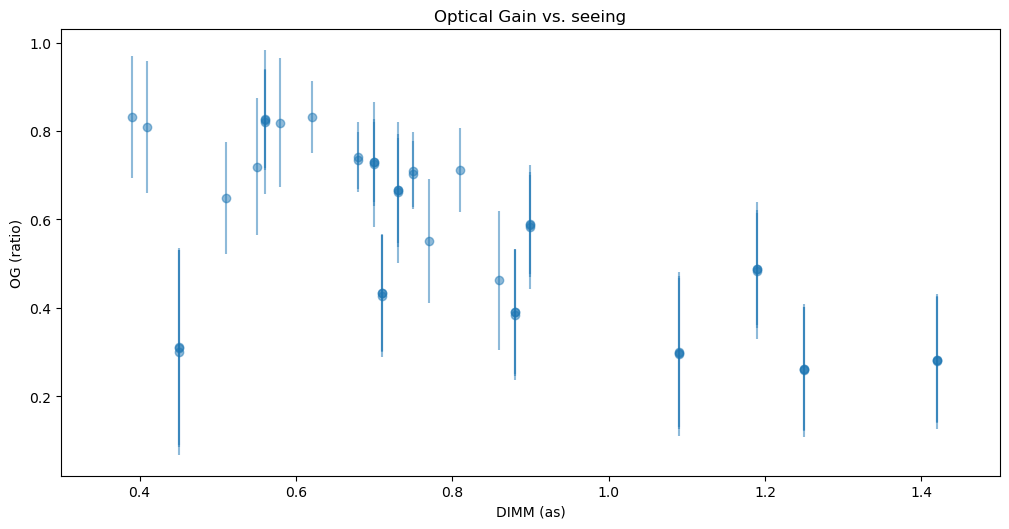

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.errorbar(df_telem_OG['dimm_fwhm'], df_telem_OG['OG'], yerr = df_telem_OG['OG_std'], alpha=0.5, fmt='o')
plt.tight_layout()
plt.xlim(0.3, 1.5)
plt.xlabel('DIMM (as)')
plt.ylabel('OG (ratio)')
plt.title('Optical Gain vs. seeing')
plt.show()

### plotting with modes controlled

In [10]:
modes_list = []
for idx, row in df_telem_OG.iterrows():
    # ok so take the column with the mode gains
    gains = np.array([float(x) for x in row['gains'].replace("[", '').replace(']', '').split(',')])
    # make a TRUE FALSE column of 1's and 0's if above or below 
    compare = np.where(gains > 0, 1, 0)
    # multiply with the mode_counts, then sum
    n_modes = np.sum(compare*mode_counts)
    modes_list.append(n_modes) 
df_telem_OG["n_modes"] = modes_list

In [11]:
# convert modes controlled to a fitting error
print(modes_list)


[1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 1564, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 1564, 1564, 1564]


## 

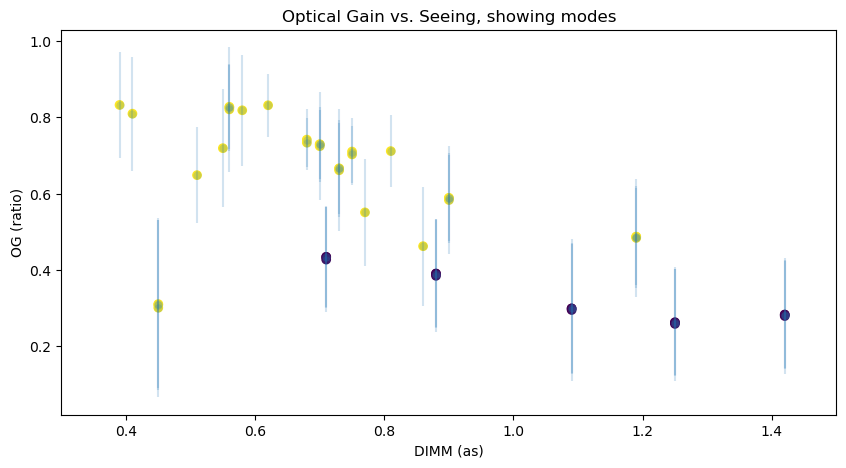

In [22]:
# PLOT: crappy way of showing modes

fig = plt.figure(figsize=(10, 5))

X = df_telem_OG['dimm_fwhm']
Y = df_telem_OG['OG']
Z = df_telem_OG['n_modes']

plt.scatter(X, Y, c=Z)
plt.errorbar(X, Y, yerr = df_telem_OG['OG_std'], alpha=0.2, marker=None, fmt='o', mew=0)

plt.xlim(0.3, 1.5)
plt.xlabel('DIMM (as)')
plt.ylabel('OG (ratio)')
plt.title('Optical Gain vs. Seeing, showing modes')
plt.show()

### Using the error budget code

In [25]:
# import the code
import sim.err_budget as eb
from importlib import reload
reload(eb)

<module 'sim.err_budget' from '/home/eden/code/sparkles/sim/err_budget.py'>

In [51]:
DIMM_list = np.arange(.3, 1.5, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list)
modes_list = [1564, 411]
jitter_list = [0,5, 10]
strehl_list = [[[eb.calc_strehl(r_o = r_i, rms_jitter = a, n_act=nm) for r_i in r_o_list] for a in jitter_list] for nm in modes_list]

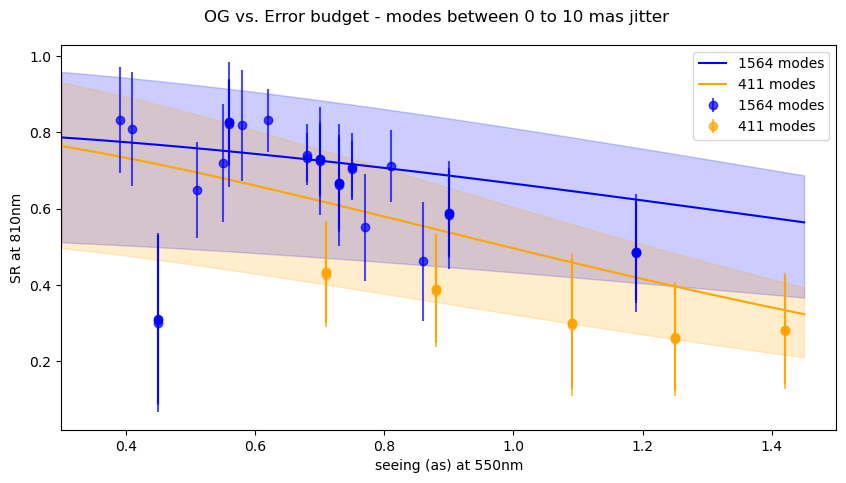

In [52]:
# PLOT: error budget included

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='white', sharey=True)
fig.suptitle("OG vs. Error budget - modes between 0 to 10 mas jitter", y = 0.95)
#fig.subplots_adjust(wspace=0, hspace = 0)

colors = ['blue', 'orange']

# Plotting the error budget
for i in range(len(modes_list)):
    axs.fill_between(DIMM_list, strehl_list[i][0], strehl_list[i][2], color=colors[i], alpha = 0.2)
    axs.plot(DIMM_list, strehl_list[i][1], c=colors[i], label = f"{modes_list[i]} modes")
    axs.set_xlabel('seeing (as) at 550nm')

for i in range(len(modes_list)):
    # only get the selfRM with those number of modes
    df_temp = df_telem_OG.loc[df_telem_OG['n_modes'] == modes_list[i]]
    X = df_temp['dimm_fwhm']
    Y = df_temp['OG']
    Z = df_temp['OG_std']

    # plot as a scatter
    plt.errorbar(X, Y, yerr = Z, alpha=0.7, marker=None, fmt='o', color=colors[i], label = f"{modes_list[i]} modes")

axs.set_ylabel('SR at 810nm')
axs.legend()
plt.xlim(0.3, 1.5)
plt.show()

## Guide star Mag

In [58]:
DIMM_list = np.arange(.3, 1.5, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list) # in meters
mags_list = np.arange(3, 8, 1)
strehl_list = [[eb.calc_strehl(r_o = r_i, s_mag = m, rms_jitter = 5) for r_i in r_o_list] for m in mags_list]

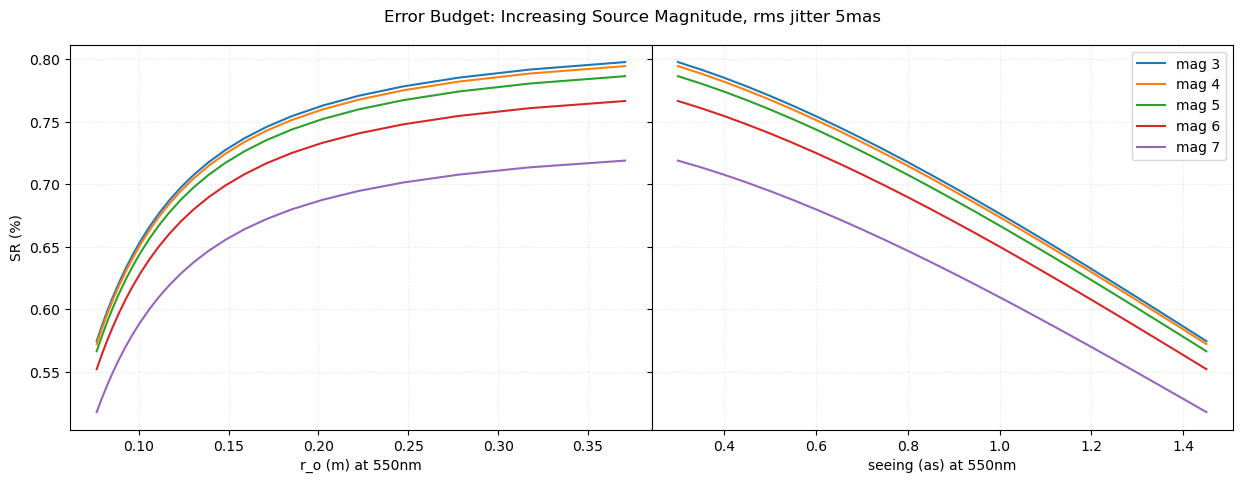

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Increasing Source Magnitude, rms jitter 5mas", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)

axs[0].grid(color='grey', linestyle=':', alpha=0.2)
axs[1].grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(mags_list)):
    axs[0].plot(r_o_list, strehl_list[i], label = f"mag {mags_list[i]}")
    axs[0].set_xlabel('r_o (m) at 550nm')

for i in range(len(mags_list)):
    axs[1].plot(DIMM_list, strehl_list[i], label = f"mag {mags_list[i]}")
    axs[1].set_xlabel('seeing (as) at 550nm')

axs[0].set_ylabel('SR (%)')
axs[1].legend()

plt.show()